### Specimen 15035 background-correction
This specimen had high staining intensity, causing the scanner to increase the luminance, leading to background-values of the png-images to be > 0.
For statistical modelling, this is an issue, since values > 0 are interpreted as reflecting staining. 

To circumvent this issue, we estimate the background intensity as the minimum measured intensity in the four corners of the image (patches of 100x100 voxels), and reset this value to 0.

In [10]:
from scipy import ndimage
from imageio import imwrite
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

## correct 15035

In [13]:
orig_dir = '/home/stevenm/data/post_mortem/original_slides_15035_without_background_fix/15035_png/'
new_dir = '/home/stevenm/data/post_mortem/stacked_slides/15035_png/'
if not os.path.exists(new_dir):
    os.makedirs(new_dir)
all_pngs = glob.glob(orig_dir + '*.png')

In [15]:
for png in all_pngs:
    img = ndimage.imread(png)
    min_in_corner0 = np.min(img[:100, :100]) # upper left
    min_in_corner1 = np.min(img[:100, -100:]) # upper right
    min_in_corner2 = np.min(img[-100:, :100]) # lower left
    min_in_corner3 = np.min(img[-100:, -100:]) # lower right

    # estimate median of background values
    background_median = np.median([min_in_corner0, min_in_corner1, min_in_corner2, min_in_corner3])
    
    # Set everything at or below this median to 0
    img[img<=background_median] = 0
    
    #save
    imwrite(new_dir + png.split('/')[-1], img)

/home/stevenm/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


## Illustrate difference

In [16]:
all_pngs = glob.glob('/home/stevenm/data/post_mortem/stacked_slides/15035_png/*.png')
all_pngs_orig = glob.glob('/home/stevenm/data/post_mortem/original_slides_15035_without_background_fix/15035_png/*.png')

/home/stevenm/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/home/stevenm/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys


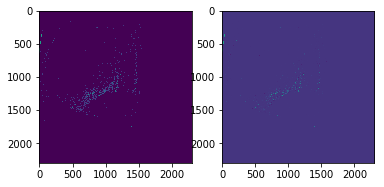

In [17]:
for png_new, png_orig in zip(all_pngs, all_pngs_orig):
    img = ndimage.imread(png_new)
    min_in_corner = np.min(img)
    
    f, ax = plt.subplots(1,2)
    ax[0].imshow(img, vmin=0, vmax=355)
    ax[1].imshow(ndimage.imread(png_orig), vmin=0, vmax=355)
    break
    print(min_in_corner)
#     if min_in_corner > 0:
#         print(min_in_corner)